<a href="https://colab.research.google.com/github/superbunny38/Projects/blob/main/X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Source: https://www.kaggle.com/pranavraikokte/covid19-image-dataset

Dataset info: It contains around 137 cleaned images of COVID-19 and 317 in total containing Viral Pneumonia and Normal Chest X-Rays structured into the test and train directories.

## Import Library and Dataset

In [ ]:
#import necessary libraries
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

In [ ]:
#mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Visualization

In [ ]:
from google.colab import files#for colab

In [ ]:
#set dataset directory
train_data_path = "/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/train"
test_data_path = "/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/test"

covid image

size of image (h x w) 3480 4248


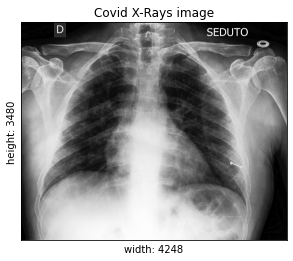

In [ ]:
#show sample covid x-rays image
img = plt.imread(os.path.join(train_data_path, "Covid/01.jpeg"))#read image from file
plt.imshow(img)#show image
height, width, dim = img.shape#get image shape
plt.title('Covid X-Rays image')#set title
plt.xlabel("width: {}".format(width))#set xlabel
plt.ylabel("height: {}".format(height))#set ylabel
plt.xticks([])#empty xticks
plt.yticks([])#empty yticks
print("size of image (h x w)",height,width)

normal image

size of image (h x w) 1708 1944


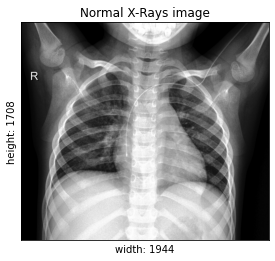

In [ ]:
#show sample normal image
img = plt.imread(os.path.join(train_data_path, "Normal/01.jpeg"))#read image
plt.imshow(img)#show image
height, width, dim = img.shape
plt.title('Normal X-Rays image')#set title
plt.xlabel("width: {}".format(width))
plt.ylabel("height: {}".format(height))
plt.xticks([])#empty xticks
plt.yticks([])#empty yticks
print("size of image (h x w)",height,width)

Viral Pneumonia image

size of image (h x w) 1333 1582


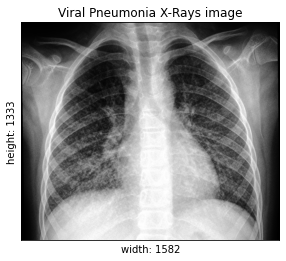

In [ ]:
#show sample Viral Pneumonia image
img = plt.imread(os.path.join(train_data_path, "Viral Pneumonia/01.jpeg"))#read image
plt.imshow(img)#show image
height, width, dim = img.shape#get image shape
plt.title('Viral Pneumonia X-Rays image')
plt.xlabel("width: {}".format(width))
plt.ylabel("height: {}".format(height))
plt.xticks([])#empty xticks
plt.yticks([])#empty yticks
print("size of image (h x w)",height,width)

In [ ]:
import os, os.path

#shapes of image
train_shapes = []#shapes of images in train dataset
test_shapes = []#shapes of images in test dataset

#train
path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/train/Covid"))
file_count_train_covid = len(files)#count image files

path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/train/Normal"))
file_count_train_normal = len(files)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/train/Viral Pneumonia"))
file_count_train_vp = len(files)#count image files

#test
path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/test/Covid"))
file_count_test_covid = len(files)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/test/Normal"))
file_count_test_normal = len(files)
path, dirs, files = next(os.walk("/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/test/Viral Pneumonia"))
file_count_test_vp = len(files)#count image files

In [ ]:
#make a dataframe for visualization
df= []
vals = [file_count_train_covid, file_count_train_normal, file_count_train_vp, file_count_test_covid, file_count_test_normal, file_count_test_vp]
for i in range(6):#number of data folders
  tmp_df = []
  if i<3:
    tmp_df.append("train")
  else:
    tmp_df.append("test")
  if i%3 == 0:
    tmp_df.append("covid")
  elif i%3 == 1:
    tmp_df.append("normal")
  else:
    tmp_df.append("vp")
  tmp_df.append(vals[i])
  print(tmp_df)
  df.append(tmp_df)

print("\n\n",df)

['train', 'covid', 111]
['train', 'normal', 70]
['train', 'vp', 70]
['test', 'covid', 26]
['test', 'normal', 20]
['test', 'vp', 20]


 [['train', 'covid', 111], ['train', 'normal', 70], ['train', 'vp', 70], ['test', 'covid', 26], ['test', 'normal', 20], ['test', 'vp', 20]]


In [ ]:
df_to_plot = pd.DataFrame(df, columns=["dataset","label","count"])
df_to_plot.head()

,dataset,label,count
0,train,covid,111
1,train,normal,70
2,train,vp,70
3,test,covid,26
4,test,normal,20


Use multi-plot to show the number of data in each folder and dataset

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


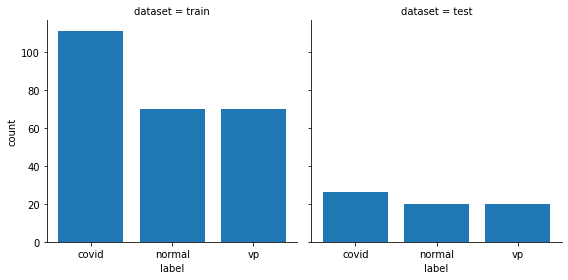

In [ ]:
#Use multi-plot to show the number of data in each folder and dataset
g = sns.FacetGrid(df_to_plot, col="dataset",size=4)#use facetgrid
g.map(plt.bar, "label","count")
plt.show()#show bar graph

Use pie chart to show distribution of label in each folder

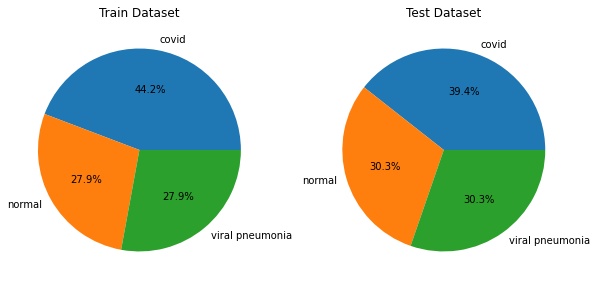

In [ ]:
#Use Pie Chart to show
total_train = np.sum(vals[:3])
total_test = np.sum(vals[3:])
train_percentage = df_to_plot[df_to_plot["dataset"] == "train"]["count"]/total_train#get percentage of label for each label in train data
test_percentage = df_to_plot[df_to_plot["dataset"] == "test"]["count"]/total_test#get percentage of label for each label in test data
labels =["covid","normal","viral pneumonia"]#list of labels

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to two pies
ax1.pie(train_percentage,labels = labels,autopct = '%1.1f%%') #plot first pie about train dataset
ax1.set_title('Train Dataset')
ax2.pie(test_percentage,labels = labels,autopct = '%1.1f%%') #plot second pie about second dataset
ax2.set_title('Test Dataset')
plt.show()#show pie chart

visualize the size of each image

In [ ]:
#visualize the size of each image
img_shapes = [[],[],[]]#shape of image of Covid, Normal, Viral Pneumonia
FILENAMES = ["Covid", "Normal", "Viral Pneumonia"]

for i in ([train_data_path, test_data_path]):#for both train and test dataset
  for j in range(len(FILENAMES)):  
    d = os.path.join(i,FILENAMES[j])
    path, dirs, files = next(os.walk(d))
 
    for file in files:
      img = plt.imread(os.path.join(path,file))
      img_shapes[j].append(list(img.shape[:2]))#store height, width of image into 'img_shapes' list
  

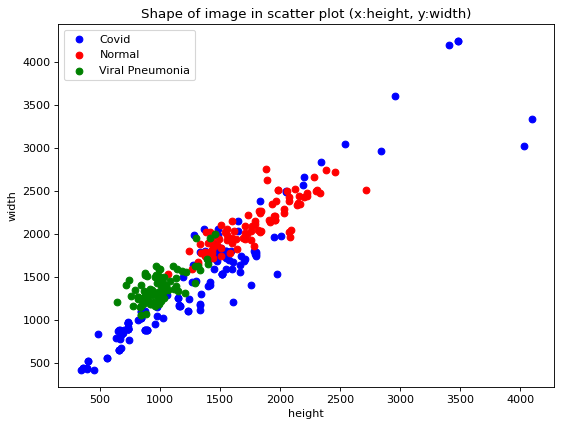

<Figure size 432x288 with 0 Axes>

In [ ]:

covid_x = []#all height size of covid images
covid_y = []#all width size of covid images

for im in img_shapes[0]:
  covid_x.append(im[0])#height
  covid_y.append(im[1])#width

normal_x = []#all height size of normal images
normal_y = []#all width size of normal images

for im in img_shapes[1]:
  normal_x.append(im[0])#height
  normal_y.append(im[1])#width

vp_x = []#all width size of viral pneumonia images
vp_y = []#all width size of viral pneumonia images

for im in img_shapes[2]:
  vp_x.append(im[0])#height
  vp_y.append(im[1])#width


#scatter plot the shape of images per label
plt.scatter(covid_x,covid_y,c='blue',label="Covid")#plot height and width of covid x-rays image
plt.scatter(normal_x, normal_y,c='red',label="Normal")#plot height and width of normal x-rays image
plt.scatter(vp_x, vp_y,c='green',label="Viral Pneumonia")#plot height and width of viral pneumonia x-rays image
plt.legend()#show legend
plt.title("Shape of image in scatter plot (x:height, y:width)")#set title
plt.xlabel("height")
plt.ylabel("width")
plt.show()#show scatter plot



In [ ]:
#see if there is any wrong height or width
print(min(covid_x),min(covid_y),min(normal_x),min(normal_y),min(vp_x),min(vp_y))

341 416 1063 1534 640 1056


## Data Preprocessing

In [ ]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_Gen = ImageDataGenerator(rescale=1/255)
test_Gen = ImageDataGenerator(rescale=1/255)

In [ ]:
#prepare train dataset suitable for training
train_dataset = train_Gen.flow_from_directory(train_data_path,
                                          target_size = (224, 224),#resize the image
                                          batch_size = 32, 
                                          class_mode = 'categorical',#dataset has 3 labels
                                          shuffle = False)#don't shuffle the data

#prepare test dataset suitable for training                                
test_dataset = test_Gen.flow_from_directory(test_data_path,
                                          target_size= (224, 224),#resize the image
                                          batch_size = 32,
                                        class_mode = 'categorical',#dataset has 3 labels
                                        shuffle = False)#don't shuffle the data

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
train_dataset.image_shape

(224, 224, 3)

## Set model

In [ ]:
#borrow structure from VGG16 model
model = tf.keras.models.Sequential([
    #block1
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)), 
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #block2
    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #block3
    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #block4
    tf.keras.layers.Conv2D(512,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #block5
    tf.keras.layers.Conv2D(512,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    #fc layer
    tf.keras.layers.Flatten(),

    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

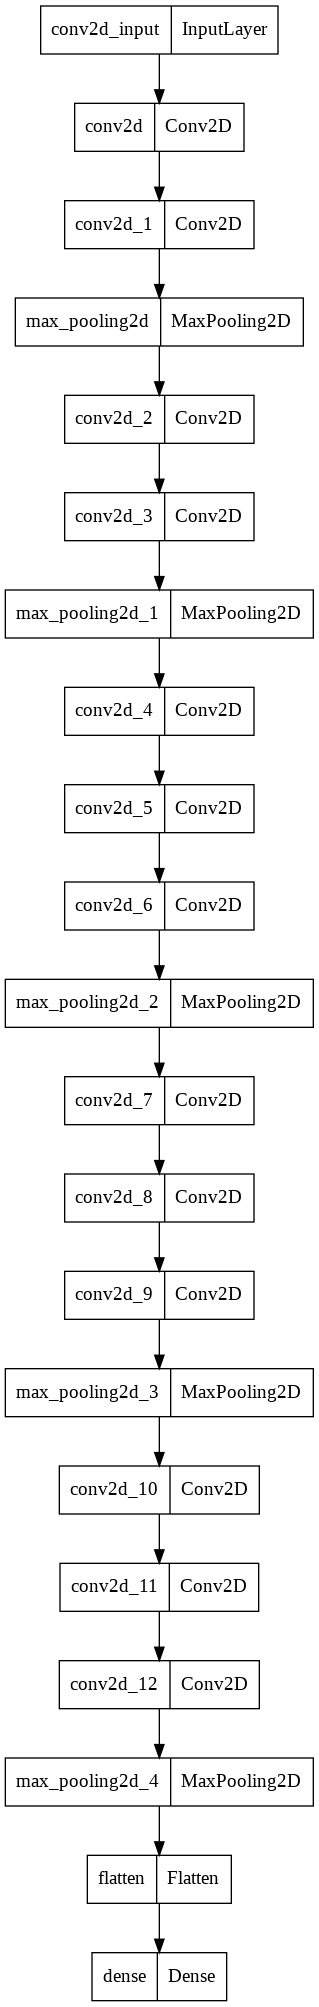

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

model optimizer and loss

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit_generator(
  train_dataset,
  epochs=15,
  steps_per_epoch=len(train_dataset)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
8/8 [==============================] - 60s 4s/step - loss: 1.1898 - accuracy: 0.3267
Epoch 2/15
8/8 [==============================] - 15s 2s/step - loss: 1.0896 - accuracy: 0.4422
Epoch 3/15
8/8 [==============================] - 15s 2s/step - loss: 1.0788 - accuracy: 0.4422
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 1.0753 - accuracy: 0.4422
Epoch 5/15
8/8 [==============================] - 15s 2s/step - loss: 1.0802 - accuracy: 0.4422
Epoch 6/15
8/8 [==============================] - 15s 2s/step - loss: 1.0765 - accuracy: 0.4422
Epoch 7/15
8/8 [==============================] - 15s 2s/step - loss: 1.0741 - accuracy: 0.4422
Epoch 8/15
8/8 [==============================] - 15s 2s/step - loss: 1.0751 - accuracy: 0.4422
Epoch 9/15
8/8 [==============================] - 15s 2s/step - loss: 1.0737 - accuracy: 0.4422
Epoch 10/15
8/8 [==============================] - 15s 2s/step - loss: 1.0744 - accuracy: 0.4422
Epoch 11/15
8/8 [======================

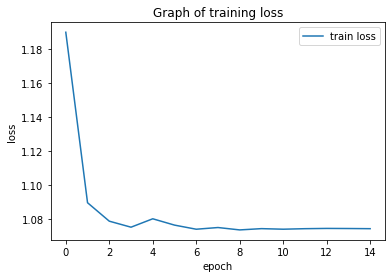

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.legend()
plt.title("Graph of training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

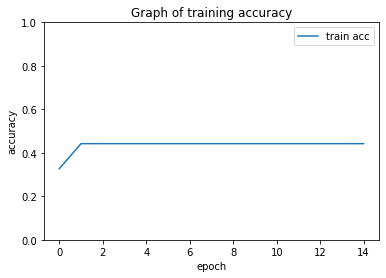

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.legend()
plt.title("Graph of training accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim(0,1)
plt.show()

## Prepare new model due to low accuracy

In [ ]:
from keras.applications.vgg16 import VGG16#get pre-trained model
IMAGE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)#set imagenet weights
for layer in vgg.layers:
  layer.trainable = False#do not modify the pre-trained weights while training

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
labels = ["Covid", "Normal", "Viral Pneumonia"]#labels
x = Flatten()(vgg.output)
last_layer=Dense(len(labels),activation='softmax')(x)#shape the output size suitable for this dataset, and modify the last layer
new_model = Model(inputs=vgg.input, outputs=last_layer)#build model with the new input layer and output layer

In [ ]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

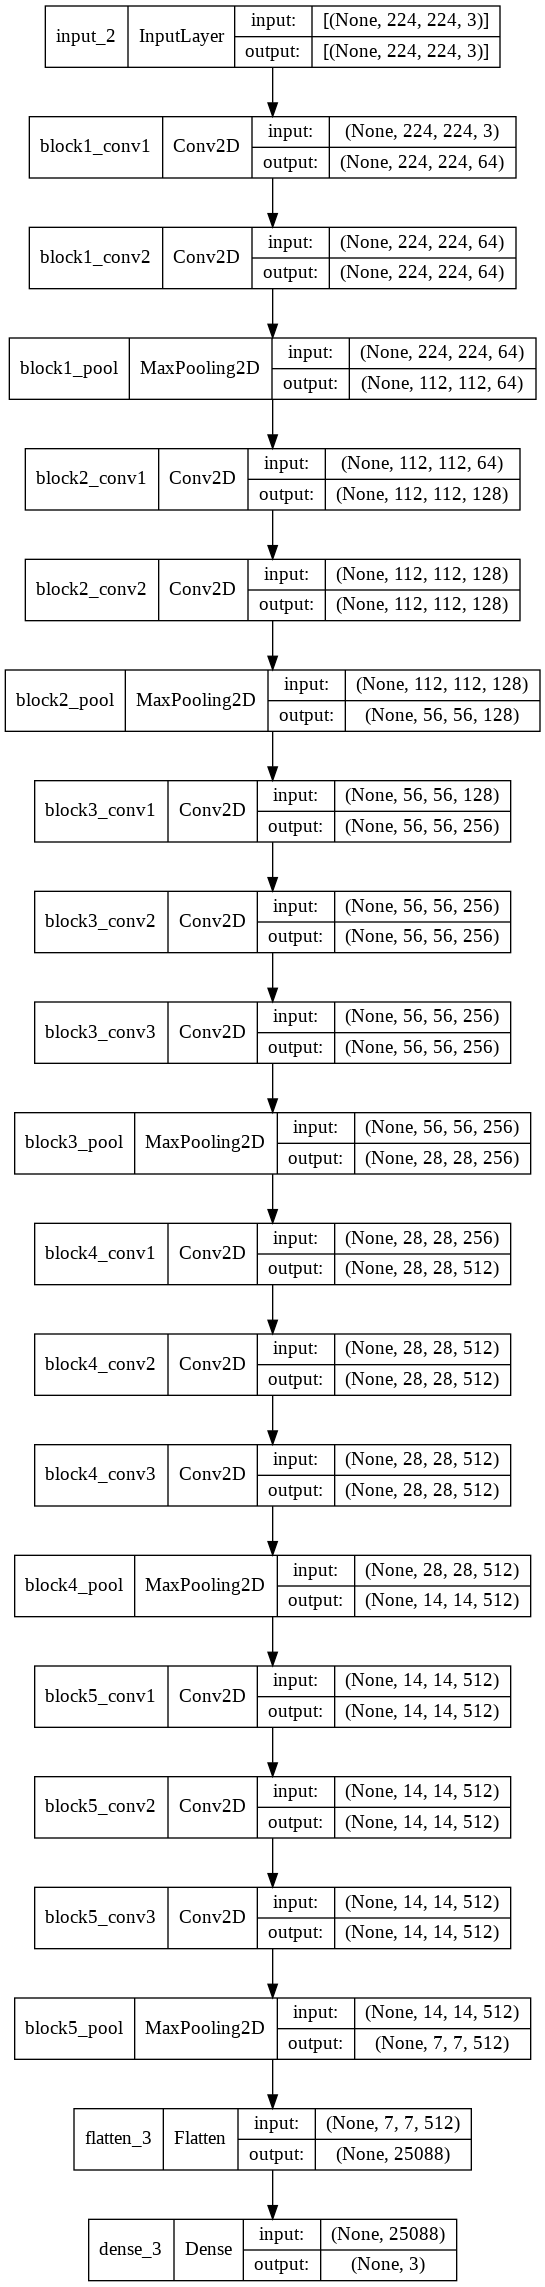

In [ ]:
plot_model(new_model,show_layer_names=True, show_shapes=True)

## Train new model

model compiling

In [ ]:
new_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model training

In [ ]:
#train model
r = new_model.fit_generator(
  train_dataset,
  epochs=8,#number of epochs
  steps_per_epoch=len(train_dataset)#8
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/8
8/8 [==============================] - 37s 3s/step - loss: 2.7013 - accuracy: 0.4861
Epoch 2/8
8/8 [==============================] - 13s 2s/step - loss: 0.9319 - accuracy: 0.6653
Epoch 3/8
8/8 [==============================] - 13s 2s/step - loss: 0.6019 - accuracy: 0.7769
Epoch 4/8
8/8 [==============================] - 13s 2s/step - loss: 0.3101 - accuracy: 0.9004
Epoch 5/8
8/8 [==============================] - 13s 2s/step - loss: 0.3636 - accuracy: 0.8606
Epoch 6/8
8/8 [==============================] - 13s 2s/step - loss: 0.1186 - accuracy: 0.9562
Epoch 7/8
8/8 [==============================] - 13s 1s/step - loss: 0.1279 - accuracy: 0.9482
Epoch 8/8
8/8 [==============================] - 13s 2s/step - loss: 0.0893 - accuracy: 0.9761


## Plot training results

training loss graph

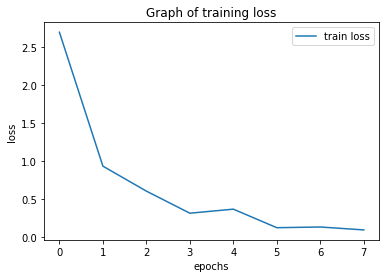

In [ ]:
#plot training loss
plt.plot(r.history['loss'], label='train loss')#show in line graph
plt.legend()
plt.title("Graph of training loss")#set title
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()#show graph

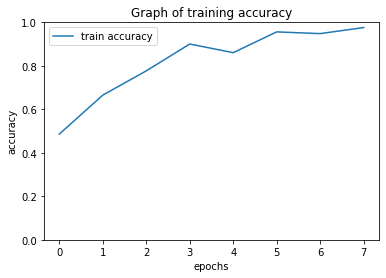

In [ ]:
#plot train accuracy
plt.plot(r.history['accuracy'], label='train accuracy')#show in line graph
plt.legend()
plt.title("Graph of training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0,1)#set limit of y axis
plt.show()#show graph

## Test the model

In [ ]:
#test the model
t = new_model.evaluate_generator(test_dataset)
train_accuracy = r.history['accuracy'][-1]
test_accuracy = t[1]#get test accuracy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


comparison of train and test result

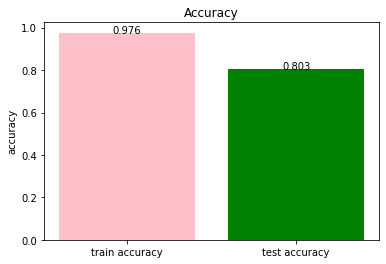

In [ ]:
#show train accuracy and test accuracy in bar chart
x_ticks = ["train accuracy","test accuracy"]#set x ticks
acc_list =[train_accuracy, test_accuracy]
up = [float(str(train_accuracy)[:5]), float(str(test_accuracy)[:5])]#the accuracy value to put on top of each bar
plt.bar(x_ticks, acc_list, color = ['pink','g'])#show in bar graph
for i in range(len(x_ticks)):
  plt.text(i, up[i],up[i],ha="center")#plot the accuracy value on top of each bar
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.show()

## Explore the result

train

In [ ]:
#predict the image labels for images in train dataset
pred=new_model.predict_generator(train_dataset,verbose=1)#predict the images by the model
predicted_class_indices=np.argmax(pred,axis=1)#get the label with the highest percentage(most likely to be the label)
labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]#convert the numbers that represent label into real category labels in string

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


8/8 [==============================] - 12s 1s/step


In [ ]:
filenames=train_dataset.filenames
real_class = []#get the real label by the folder name
for f in filenames:
  real_c, _ = f.split("/")#preprocess the foldername to convert it to label
  real_class.append(real_c)#append the label into real label list

In [ ]:
results=pd.DataFrame({"Real Class":real_class,
                      "Predictions":predictions})#make dataframe of predicted labels and real labels for each image in train dataset
results.head()#show the dataframe

,Real Class,Predictions
0,Covid,Covid
1,Covid,Covid
2,Covid,Covid
3,Covid,Covid
4,Covid,Covid


misclassification(classification error)

In [ ]:
print("misclassification happened in {} training images".format(len(results[results["Real Class"] != results["Predictions"]])))

#store the dataframe where real label is not same as predicted label
train_misclassification = results[results["Real Class"] != results["Predictions"]]

misclassification happened in 5 training images


In [ ]:
train_misclassification

,Real Class,Predictions
92,Covid,Viral Pneumonia
147,Normal,Viral Pneumonia
153,Normal,Viral Pneumonia
175,Normal,Viral Pneumonia
181,Viral Pneumonia,Normal


In [ ]:
#predict the labels of image in test dataset
test_pred=new_model.predict_generator(test_dataset,verbose=1)#predict with the model
test_predicted_class_indices=np.argmax(test_pred,axis=1)#get the most likely label based on percentage
test_labels = (test_dataset.class_indices)
test_labels = dict((v,k) for k,v in test_labels.items())
test_predictions = [test_labels[k] for k in test_predicted_class_indices]#convert the digit into string labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


3/3 [==============================] - 2s 664ms/step


In [ ]:
filenames=test_dataset.filenames
real_class = []#make a list containing real labels of test dataset images
for f in filenames:
  real_c, _ = f.split("/")
  real_class.append(real_c)

In [ ]:
test_results=pd.DataFrame({"Real Class":real_class,
                      "Predictions":test_predictions})
test_results.head()

,Real Class,Predictions
0,Covid,Covid
1,Covid,Covid
2,Covid,Covid
3,Covid,Covid
4,Covid,Covid


In [ ]:
print("misclassification happened in {} test images".format(len(test_results[test_results["Real Class"] != test_results["Predictions"]])))
test_misclassification = test_results[test_results["Real Class"] != test_results["Predictions"]]
test_misclassification

misclassification happened in 13 test images


,Real Class,Predictions
26,Normal,Viral Pneumonia
29,Normal,Viral Pneumonia
31,Normal,Viral Pneumonia
32,Normal,Viral Pneumonia
33,Normal,Viral Pneumonia
34,Normal,Viral Pneumonia
35,Normal,Viral Pneumonia
36,Normal,Viral Pneumonia
37,Normal,Viral Pneumonia
38,Normal,Viral Pneumonia


In [ ]:
misclassification = pd.concat([train_misclassification, test_misclassification])
misclassification

,Real Class,Predictions
92,Covid,Viral Pneumonia
147,Normal,Viral Pneumonia
153,Normal,Viral Pneumonia
175,Normal,Viral Pneumonia
181,Viral Pneumonia,Normal
26,Normal,Viral Pneumonia
29,Normal,Viral Pneumonia
31,Normal,Viral Pneumonia
32,Normal,Viral Pneumonia
33,Normal,Viral Pneumonia


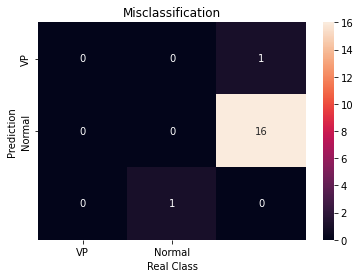

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(misclassification["Real Class"], misclassification["Predictions"])#make confusion matrix with misclassification
sns.heatmap(conf_matrix, annot=True, yticklabels=['VP','Normal'], xticklabels=['VP','Normal'])#show the confusion matrix by heat map
plt.title("Misclassification")#set title
plt.ylabel("Prediction")
plt.xlabel("Real Class")
plt.show()